In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Downloads\\customer_booking.csv", encoding="ISO-8859-1")

In [2]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [4]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [5]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [6]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [7]:
df.shape

(50000, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 5.3+ 

In [9]:
#df.head()
df.iloc[50:100]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
50,1,Internet,RoundTrip,77,96,9,2,AKLICN,New Zealand,1,0,1,6.62,0
51,1,Internet,RoundTrip,65,17,9,3,AKLICN,New Zealand,1,0,0,6.62,0
52,1,Internet,RoundTrip,24,25,8,4,AKLICN,South Korea,1,0,1,6.62,0
53,1,Internet,RoundTrip,47,69,2,3,AKLICN,South Korea,1,1,1,6.62,0
54,1,Internet,RoundTrip,22,89,14,2,AKLICN,South Korea,1,0,1,6.62,0
55,2,Internet,RoundTrip,11,25,4,4,AKLICN,South Korea,1,0,1,6.62,0
56,1,Internet,RoundTrip,35,25,6,2,AKLICN,South Korea,0,0,1,6.62,0
57,1,Internet,RoundTrip,272,21,14,2,AKLICN,New Zealand,1,0,0,6.62,0
58,1,Internet,RoundTrip,20,18,10,1,AKLICN,New Zealand,0,0,0,6.62,0
59,1,Internet,RoundTrip,250,23,9,7,AKLICN,South Korea,1,0,1,6.62,0


Sales Channel

In [10]:
per_internet = (df['sales_channel'] == 'Internet').mean() * 100
per_phone = (df['sales_channel'] == 'Mobile').mean() * 100

print(f"Number of bookings done through internet: {per_internet:.2f}%")
print(f"Number of bookings done through phone call: {per_phone:.2f}%")

Number of bookings done through internet: 88.76%
Number of bookings done through phone call: 11.24%


Trip type

In [11]:
per_round = (df['trip_type'] == 'RoundTrip').mean() * 100
per_oneway = (df['trip_type'] == 'OneWay').mean() * 100
per_circle = (df['trip_type'] == 'CircleTrip').mean() * 100

In [12]:
print(f"Percentage of round trips: {per_round} %")
print(f"Percentage of One way trips: {per_oneway} %")
print(f"Percentage of circle trips: {per_circle} %")

Percentage of round trips: 98.994 %
Percentage of One way trips: 0.774 %
Percentage of circle trips: 0.232 %


Purchase Lead

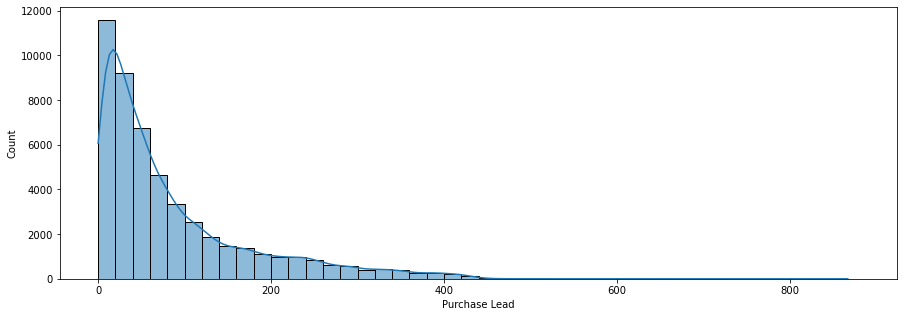

In [13]:
# Set the size of the figure
plt.figure(figsize=(15, 5))

# Plot a histogram of the "purchase_lead" column of the dataframe "df"
sns.histplot(data=df, x="purchase_lead",  binwidth=20, kde=True)

# Add x-axis label
plt.xlabel("Purchase Lead")

# Show the plot
plt.show()


In [14]:
(df.purchase_lead >600).value_counts()

False    49992
True         8
Name: purchase_lead, dtype: int64

In [15]:
df[df.purchase_lead > 600]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
835,3,Internet,RoundTrip,641,46,6,7,AKLKUL,Malaysia,1,0,1,8.83,1
6148,1,Internet,RoundTrip,614,19,11,3,COKMEL,Australia,0,0,0,8.83,0
24119,1,Internet,RoundTrip,704,23,8,2,PNHSYD,Australia,0,0,0,8.58,0
38356,2,Internet,RoundTrip,633,5,10,6,HKTOOL,Australia,0,0,1,8.83,0
39417,1,Mobile,RoundTrip,625,5,15,5,ICNRGN,Myanmar (Burma),0,0,0,6.62,0
42916,1,Mobile,RoundTrip,605,6,18,4,BLRMEL,India,0,0,0,8.83,0
46716,2,Internet,RoundTrip,606,6,6,5,HKTTPE,United States,0,0,1,4.67,0
48259,3,Internet,RoundTrip,867,6,7,1,KIXMLE,Japan,0,0,1,7.00,1


In [16]:
#filtering the data to have only purchase lead days less than 600 days
df = df[df.purchase_lead <600 ]

Length of stay

<AxesSubplot:xlabel='length_of_stay', ylabel='Count'>

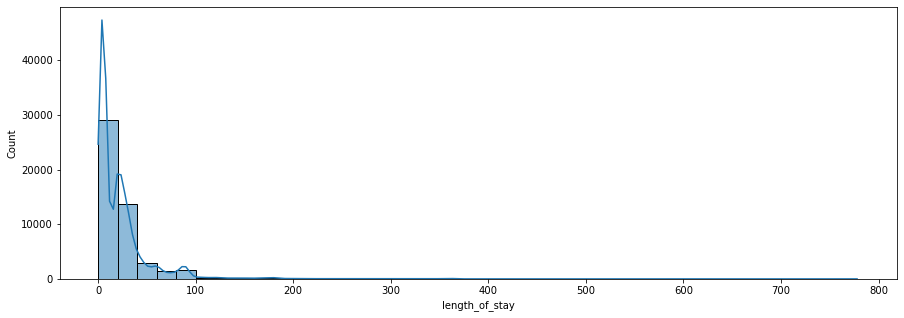

In [17]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="length_of_stay", binwidth=20, kde=True)

In [18]:
(df.length_of_stay> 200).value_counts()

False    49713
True       279
Name: length_of_stay, dtype: int64

In [19]:
df[df.length_of_stay> 500].booking_complete.value_counts()

0    9
1    1
Name: booking_complete, dtype: int64

In [20]:
#filtering the data to have only length of stay days less than 500 days
df = df[df.purchase_lead <500 ]

Flight_day

In [21]:
df.flight_day.value_counts()

1    8100
3    7671
2    7670
4    7423
5    6759
7    6550
6    5809
Name: flight_day, dtype: int64

Booking Origin

Text(0, 0.5, 'Number of bookings')

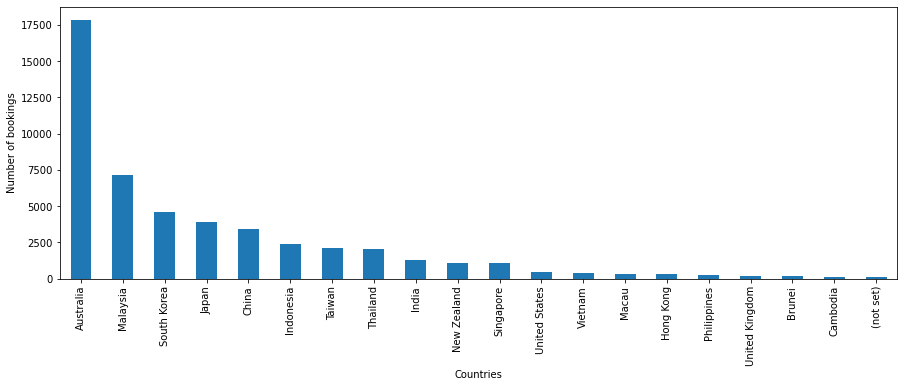

In [22]:
plt.figure(figsize=(15,5))
ax = df.booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of bookings")

Text(0, 0.5, 'Number of complete bookings')

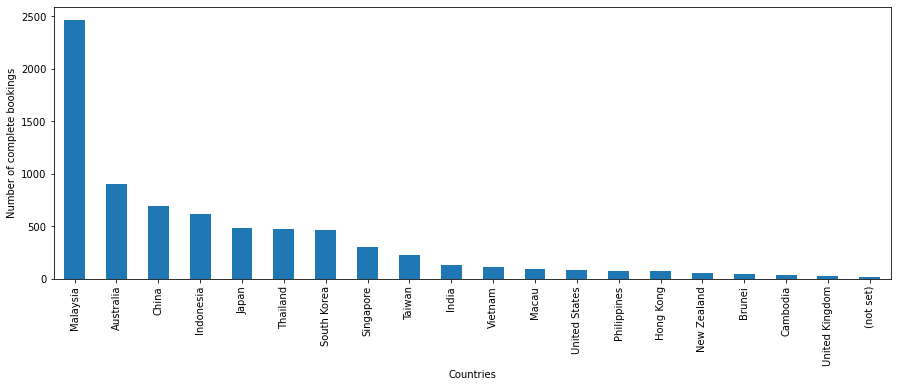

In [23]:
plt.figure(figsize=(15,5))
ax = df[df.booking_complete ==1].booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of complete bookings")

In [24]:
successful_booking_per = df.booking_complete.value_counts().values[0] / len(df) * 100
unsuccessful_booking_per = 100-successful_booking_per
print(f"Out of 50000 booking entries only {round(unsuccessful_booking_per,2)} % bookings were successfull or complete.")

Out of 50000 booking entries only 14.96 % bookings were successfull or complete.


In [26]:
cwd = os.getcwd()
df.to_csv(cwd + "/filtered_customer_booking.csv")